In [1]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt

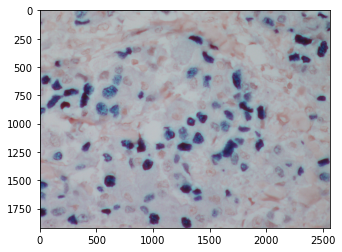

In [2]:
img1=cv2.imread("2141 KI67.jpg")
plt.imshow(img1)

In [3]:
hist_c,bins_c = np.histogram(img1.flatten(),256,[0,256])

# Generating the cumulative distribution function of the original image
cdf_c = hist_c.cumsum()
cdf_c_normalized = cdf_c * hist_c.max()/ cdf_c.max()

In [4]:
image_yuv = cv2.cvtColor(img1, cv2.COLOR_BGR2YUV)

# Applying Histogram Equalization on the original imageof the Y channel
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

# Convert the YUV image back to RGB format
image_c_equalized = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

# Generating the histogram of the equalized image
hist_c_equalized, bins_c_equalized = np.histogram(image_c_equalized.flatten(),256,[0,256])

# Generating the cumulative distribution function of the original image
cdf_c_equalized = hist_c_equalized.cumsum()
cdf_c_equalized_normalized = cdf_c_equalized * hist_c_equalized.max()/ cdf_c_equalized.max()

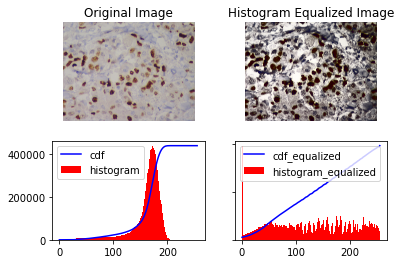

In [5]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(cv2.cvtColor(image_c_equalized, cv2.COLOR_BGR2RGB))
axs[0, 1].axis('off')
axs[0, 1].set_title('Histogram Equalized Image')


axs[1, 0].plot(cdf_c_normalized, color = 'b')
axs[1, 0].hist(img1.flatten(),256,[0,256], color = 'r')
axs[1, 0].legend(('cdf','histogram'), loc = 'upper left')



axs[1, 1].plot(cdf_c_equalized_normalized, color = 'b')
axs[1, 1].hist(image_c_equalized.flatten(),256,[0,256], color = 'r')
axs[1, 1].legend(('cdf_equalized','histogram_equalized'), loc = 'upper left')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

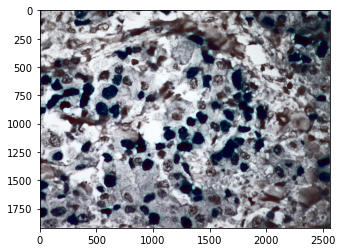

In [6]:
plt.imshow(image_c_equalized)

In [7]:
save_img=cv2.cvtColor(image_c_equalized, cv2.COLOR_BGR2RGB)
cv2.imwrite("2141_contrast.jpg",save_img)

True

In [8]:
blur = cv2.GaussianBlur(image_c_equalized,(13,13),0)

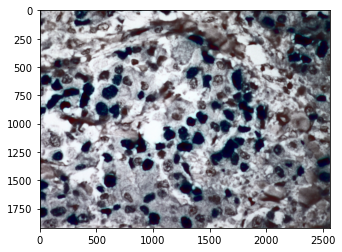

In [9]:
plt.imshow(blur)

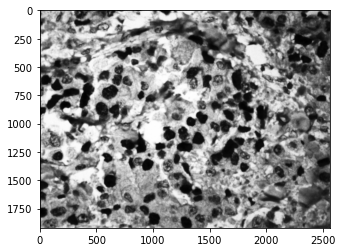

In [10]:
gray1=cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
plt.imshow(gray1,'gray')

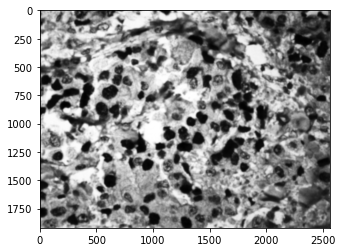

In [11]:
blur = cv2.GaussianBlur(gray1,(21,21),0)
plt.imshow(blur,'gray')

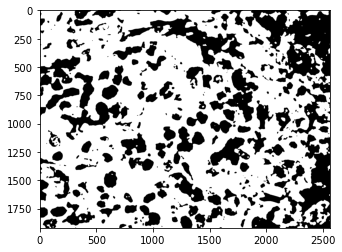

In [12]:
threshold,binary2=cv2.threshold(blur,100,255,cv2.THRESH_BINARY)
plt.imshow(binary2,'gray')

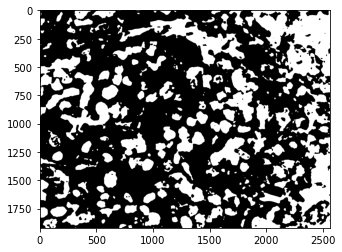

In [13]:
binary=binary2-255
plt.imshow(binary,'gray')


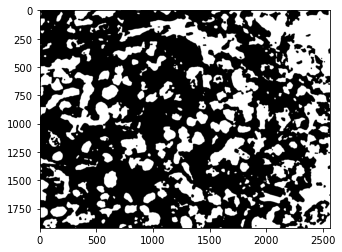

In [14]:
kernel = np.ones((3,3),np.uint8)
closed = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel=kernel, iterations=4)
plt.imshow(closed,'gray')

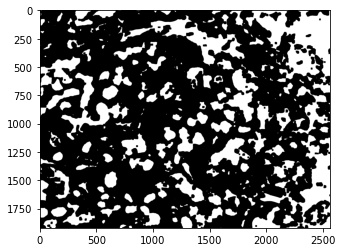

In [15]:
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(closed, kernel, iterations=5)
plt.imshow(erosion,'gray')

In [16]:
contour2, hierarchy = cv2.findContours(image=erosion.copy(), mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

In [17]:
contour_all=len(contour2)
len(contour2)

285

0.0 0
403.0 1
956.5 2
246.5 3
43.0 4
550.0 5
945.5 6
0.0 7
6065.5 8
254.0 9
48.5 10
1403.0 11
0.5 12
224.5 13
7958.0 14
4494.5 15
189.0 16
993.0 17
130.0 18
3922.5 19
2.0 20
4874.0 21
8518.5 22
22056.5 23
744.0 24
19877.5 25
14679.0 26
5321.0 27
296.5 28
6467.5 29
211.0 30
3694.0 31
178.5 32
20524.5 33
2892.0 34
12.5 35
0.0 36
7.5 37
1920.5 38
94.5 39
706.0 40
2719.0 41
10.5 42
3092.5 43
5719.0 44
517.5 45
7283.5 46
55.5 47
12.0 48
2552.5 49
6917.5 50
20.5 51
187.5 52
1.5 53
2245.5 54
20.0 55
671.5 56
107.0 57
2562.5 58
6699.5 59
103.0 60
1.0 61
628.0 62
3789.0 63
8594.0 64
171.0 65
21.5 66
500.5 67
9.5 68
26338.0 69
50.0 70
123.5 71
37.0 72
11731.5 73
289.5 74
206.5 75
436.5 76
3504.0 77
76.0 78
3.0 79
0.0 80
15554.5 81
329.5 82
7.0 83
7072.5 84
3330.5 85
4058.5 86
4011.5 87
73.5 88
118.0 89
10.0 90
2603.5 91
13521.0 92
90.0 93
1704.5 94
67.5 95
2762.5 96
13534.5 97
0.0 98
28.5 99
132.5 100
49.0 101
724.0 102
275.0 103
4193.5 104
4921.0 105
0.0 106
0.0 107
15.5 108
46.5 109
0.0 110
26

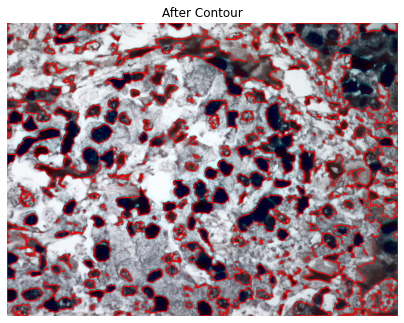

In [18]:
cells=0
for i in range(len(contour2)):
    cv2.drawContours(image=image_c_equalized,contours=contour2,contourIdx=i, color=(255,0,0), thickness=5)
    area=cv2.contourArea(contour2[i])
    print(area,i)
    if(area>700):
        if(area>4500):
            cells=cells+(area//4500)
        else:
            cells=cells+1 
plt.figure(figsize=(7,7)), plt.title("After Contour"), plt.imshow(image_c_equalized, cmap="gray"), plt.axis("off");


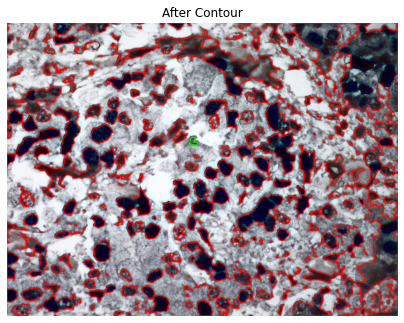

In [19]:
cv2.drawContours(image=image_c_equalized,contours=contour2,contourIdx=173, color=(0,255,0), thickness=5)
plt.figure(figsize=(7,7)), plt.title("After Contour"), plt.imshow(image_c_equalized, cmap="gray"), plt.axis("off");


In [20]:
cells


320.0

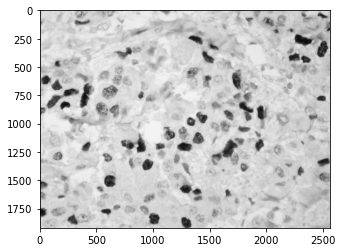

In [21]:
gray_org=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_org,'gray')

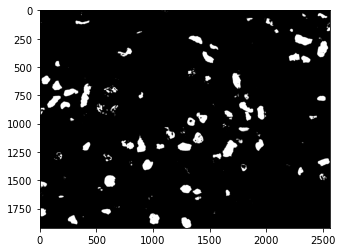

In [22]:
thresh, binary = cv2.threshold(gray_org, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
plt.imshow(binary,'binary')

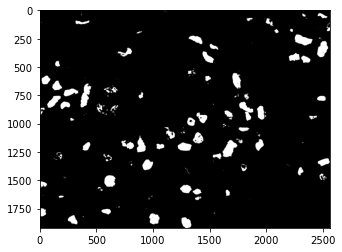

In [23]:
binary=binary-255
plt.imshow(binary,'gray')

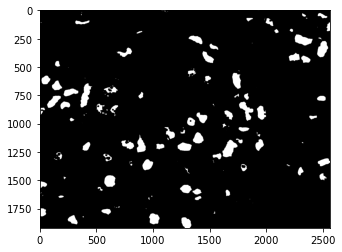

In [24]:
kernel = np.ones((3,3),np.uint8)
closed = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel=kernel, iterations=5)
plt.imshow(closed,'gray')

In [25]:
contour2, hierarchy = cv2.findContours(image=closed.copy(), mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

In [26]:
contour_brown=len(contour2)
len(contour2)

165

6149.0 0
65.0 1
4218.5 2
6604.5 3
127.0 4
0.0 5
2768.5 6
10.0 7
3135.5 8
7.0 9
102.0 10
0.0 11
0.5 12
0.0 13
0.0 14
0.0 15
4.0 16
132.0 17
1247.5 18
1.0 19
60.0 20
632.5 21
17.0 22
55.0 23
1549.5 24
2588.0 25
578.5 26
5314.5 27
2425.5 28
219.5 29
8026.0 30
2137.0 31
7.5 32
349.5 33
4.5 34
2189.5 35
170.5 36
2356.5 37
0.0 38
267.0 39
0.0 40
36.0 41
6185.0 42
4706.0 43
85.5 44
0.0 45
3.5 46
2803.5 47
2393.0 48
1026.5 49
2540.5 50
6762.5 51
3319.5 52
67.0 53
33.0 54
4840.5 55
11325.5 56
4647.0 57
1174.5 58
122.5 59
0.0 60
6948.5 61
284.5 62
0.0 63
6264.5 64
61.5 65
0.0 66
647.0 67
25.5 68
2561.0 69
4158.5 70
31.0 71
520.5 72
0.0 73
0.0 74
711.5 75
3854.5 76
1401.0 77
45.5 78
94.5 79
9.5 80
5075.5 81
127.0 82
3389.0 83
72.5 84
1306.5 85
6411.5 86
2097.5 87
71.5 88
2679.5 89
8695.0 90
3726.5 91
0.0 92
0.0 93
2665.0 94
6615.0 95
0.0 96
85.0 97
0.0 98
19.0 99
488.0 100
1.0 101
1523.5 102
1440.5 103
0.0 104
5572.5 105
0.0 106
3.5 107
1.0 108
3755.0 109
10823.0 110
49.0 111
15.0 112
0.0 113
469

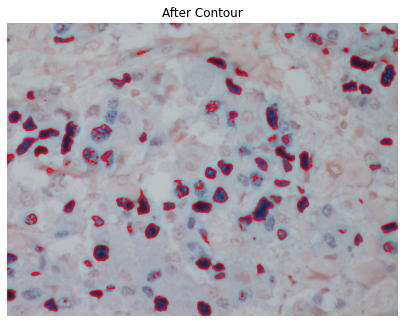

In [27]:
cells_brown=0
for i in range(len(contour2)):
    cv2.drawContours(image=img1,contours=contour2,contourIdx=i, color=(255,0,0), thickness=5)
    area=cv2.contourArea(contour2[i])
    print(area,i)
    if(area>1):
        cells_brown=cells_brown+1
    
plt.figure(figsize=(7,7)), plt.title("After Contour"), plt.imshow(img1, cmap="gray"), plt.axis("off");

In [28]:
cells_brown

131

In [29]:
#manualcount_blue=295
#manualcount_brown=47

actual_percent_positivity=(90/164)*100
actual_percent_positivity


54.87804878048781

In [30]:
#without area manipulations

percent_positivity=(contour_brown/contour_all)*100
percent_positivity


57.89473684210527

In [31]:
error_rate = abs(actual_percent_positivity-percent_positivity)/actual_percent_positivity
error_rate=error_rate*100
error_rate

5.497076023391812

In [32]:
accuracy=100-(error_rate)
accuracy

94.50292397660819

In [33]:
#area manipulations
percent_positivity_1=(cells_brown/cells)*100
percent_positivity_1


40.9375

In [34]:
error_rate = abs((actual_percent_positivity-percent_positivity_1))/actual_percent_positivity
error_rate=error_rate*100
error_rate

25.402777777777786

In [35]:
accuracy=100-(error_rate)
accuracy

74.59722222222221